In [1]:
from math import ceil
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, \
    f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay
from datetime import datetime
from sklearn.metrics import hinge_loss
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV    
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# Training data for baseline model and GridSearch
def splitting_data(dataset: pd.DataFrame):
    data_size = len(dataset)
    train_size = ceil(data_size * .8)
    val_size = ceil((data_size - train_size) * .5)
    # print(train_size, test_size)
    train = dataset.iloc[:train_size]
    vali = dataset.iloc[train_size:train_size+val_size]
    test = dataset.iloc[train_size+val_size:]

    X_train = train.drop('Label', axis=1)
    y_train = train['Label']

    X_val = vali.drop('Label', axis=1)
    y_val = vali['Label']

    X_test = test.drop('Label', axis=1)
    y_test = test['Label']

    return X_train, X_val, X_test, y_train, y_val, y_test

def split_data(X, y):
    """
    Splits the input data X and output data y into training, validation, and test sets with a ratio of 80/10/10.
    Returns the resulting as tuples X_train, X_val, X_test, y_train, y_val, y_test.
    """
    # Split the data into 80% training set and 20% test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split the remaining 20% test set into 50% validation set and 50% test set
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

    # Return the resulting sets
    return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
# folder_path = '/Users/gabrielchung/Documents/Data 245/Final Presentation/Car Hacking Dataset/9) Car-Hacking Dataset/{0}_dataset.csv'
train = pd.read_csv('/Users/agabbiti/dev/Work/data270/train_flooding_data.csv')
le = LabelEncoder()
train['ID'] = le.fit_transform(train['ID'])
train.fillna(0.0000, inplace=True)

test = pd.read_csv('/Users/agabbiti/dev/Work/data270/test_flooding_data.csv')

test['ID'] = le.fit_transform(test['ID'])
test.fillna(0.0000, inplace=True)

data = pd.concat([train, test],ignore_index=True)

X = data.drop('Label', axis=1)
Y = data['Label']

X = X.sample(frac=0.005, random_state=42)
Y = Y.sample(frac=0.005, random_state=42)




In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=6)
X = pca.fit_transform(X)

In [5]:
data.head()

,Label,Time,ID,Signal1_of_ID,Signal2_of_ID,Signal3_of_ID,Signal4_of_ID
0,0,8.100845e+07,3,0.200000,1.000000,0.0,0.0
1,0,8.100846e+07,9,0.370003,0.000000,0.0,0.0
2,0,8.100846e+07,7,0.044139,0.000000,0.0,0.0
3,0,8.100846e+07,8,0.170534,0.000000,0.0,0.0
4,0,8.100846e+07,5,0.173044,0.874886,0.0,0.0


In [6]:

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, Y)

In [7]:
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

Baseline model to compare the Features selected by the methods

Training time: 0.04991221666666667


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



        SVM Linear
        Accuracy: 0.6972049689440993
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        Loss score: 1.0
        
Training time: 0.11509818333333333


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



        SVM RBF
        Accuracy: 0.6972049689440993
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        Loss score: 1.0
        
Training time: 0.10343146666666667

        SVM Sigmoid
        Accuracy: 0.59472049689441
        Precision: 0.30701754385964913
        Recall: 0.2692307692307692
        F1-Score: 0.28688524590163933
        ROC AUC: 0.5026554737022443
        Loss score: 1.1024844720496894
        
Training time: 0.12118754999999999

        SVM Polynomial
        Accuracy: 0.7010869565217391
        Precision: 1.0
        Recall: 0.01282051282051282
        F1-Score: 0.02531645569620253
        ROC AUC: 0.5064102564102564
        Loss score: 0.9961180124223602
        


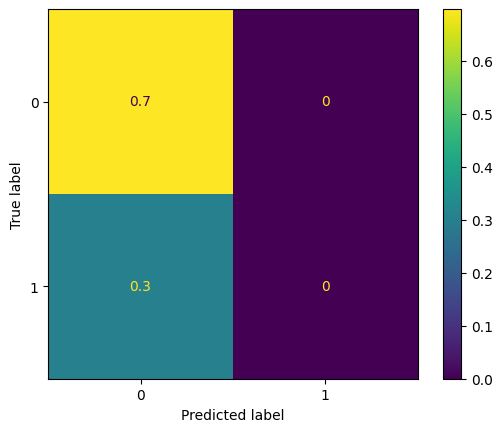

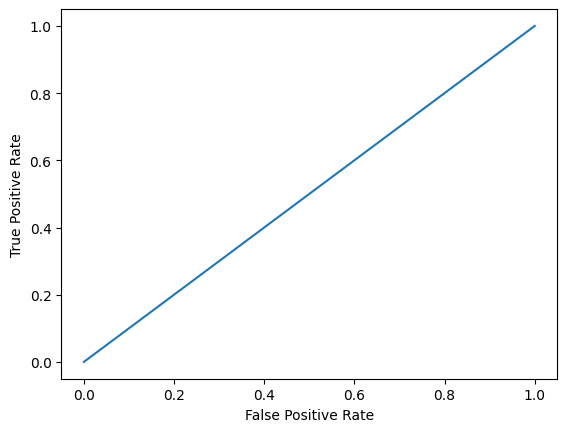

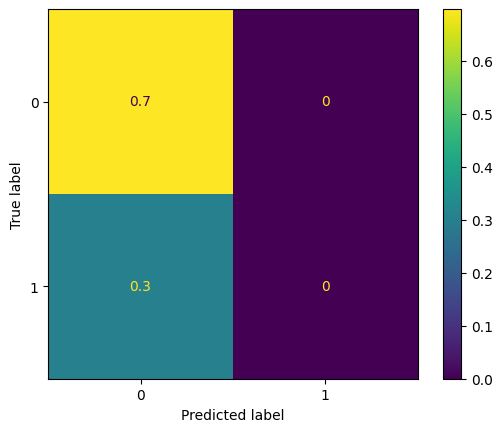

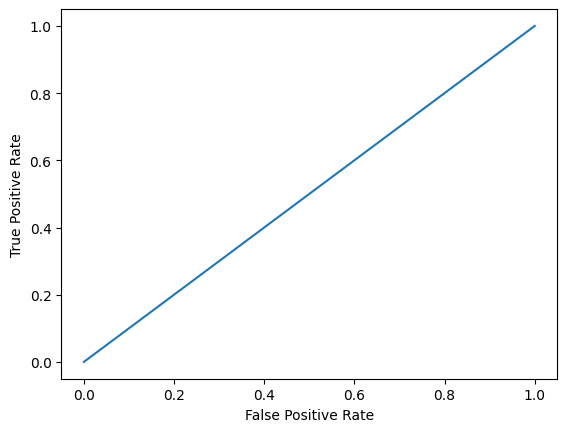

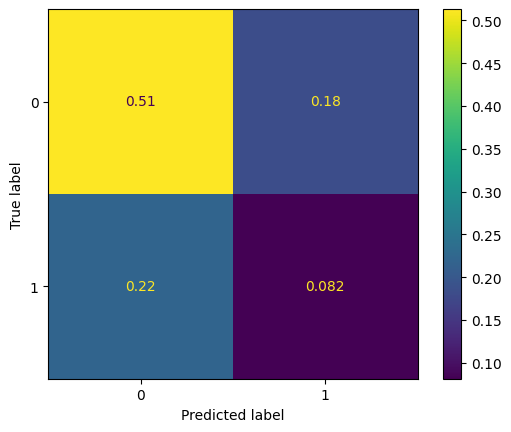

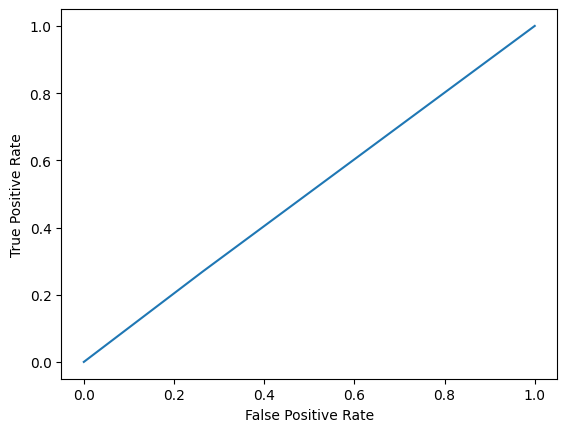

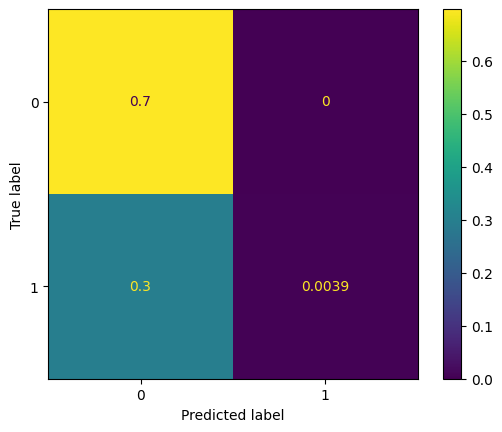

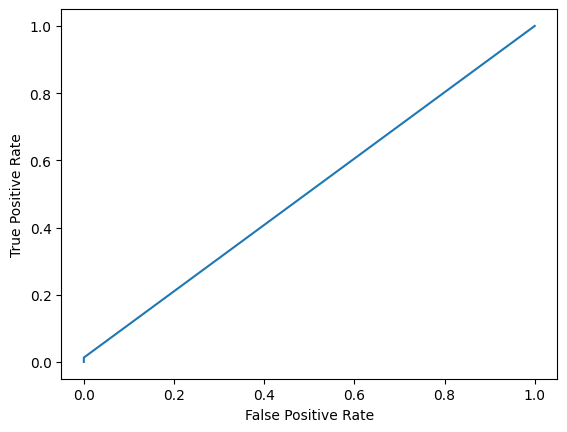

In [10]:

svcPoly = SVC(kernel='poly', degree=3, gamma='scale', C=0.1, coef0=0.5)
svcLinear = SVC(kernel='linear', gamma='scale', C=0.1)
svcRbf = SVC(kernel='rbf', gamma='scale', C=0.1)
svcSigmoid = SVC(kernel='sigmoid', gamma='scale', C=0.1, coef0=0.5)

svmPolynomial = BaggingClassifier(base_estimator=svcPoly, n_estimators=5, random_state=42)
svmLinear = BaggingClassifier(base_estimator=svcLinear, n_estimators=5, random_state=42)
svmRbf = BaggingClassifier(base_estimator=svcRbf, n_estimators=5, random_state=42)
svmSigmoid = BaggingClassifier(base_estimator=svcSigmoid, n_estimators=5, random_state=42)

for fe_type, xtr, xte, model in [('SVM Linear', X_train, X_test, svmLinear), ('SVM RBF', X_train, X_test, svmRbf), ('SVM Sigmoid', X_train, X_test, svmSigmoid), ('SVM Polynomial', X_train, X_test, svmPolynomial)]:
    start_time = datetime.now()
    model.fit(xtr, y_train)
    end_time = datetime.now()
    time_diff = end_time - start_time
    print(f"Training time: {time_diff.total_seconds() / 60}")

    y_pred = model.predict(xte)
    print(
        f"""
        {fe_type}
        Accuracy: {accuracy_score(y_test, y_pred)}
        Precision: {precision_score(y_test, y_pred)}
        Recall: {recall_score(y_test, y_pred)}
        F1-Score: {f1_score(y_test, y_pred)}
        ROC AUC: {roc_auc_score(y_test, y_pred)}
        Loss score: {hinge_loss(y_test, y_pred)}
        """
    )
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='all')
    cm_display = ConfusionMatrixDisplay(conf_matrix).plot()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Testing the models on the validation set

Testing time: 0.007375066666666667


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



        SVM Linear
        Accuracy: 0.7220496894409938
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        Loss score: 1.0
        
Testing time: 0.04269258333333333


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



        SVM RBF
        Accuracy: 0.7220496894409938
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        Loss score: 1.0
        
Testing time: 0.009017616666666667

        SVM Sigmoid
        Accuracy: 0.6273291925465838
        Precision: 0.33689839572192515
        Recall: 0.35195530726256985
        F1-Score: 0.3442622950819672
        ROC AUC: 0.5426443202979516
        Loss score: 1.09472049689441
        
Testing time: 0.008722349999999999

        SVM Polynomial
        Accuracy: 0.7251552795031055
        Precision: 0.8333333333333334
        Recall: 0.013966480446927373
        F1-Score: 0.027472527472527472
        ROC AUC: 0.5064456058148614
        Loss score: 0.9968944099378882
        


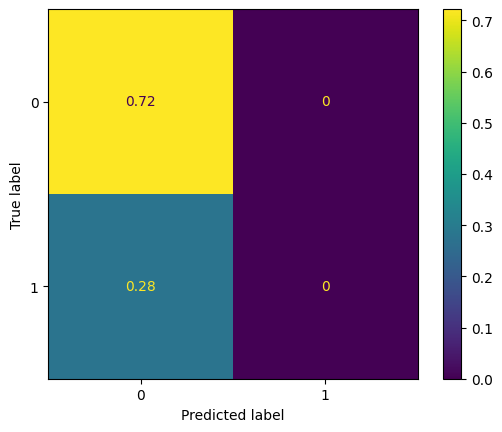

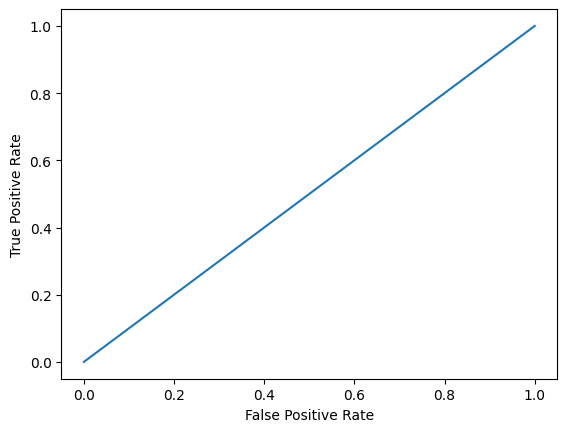

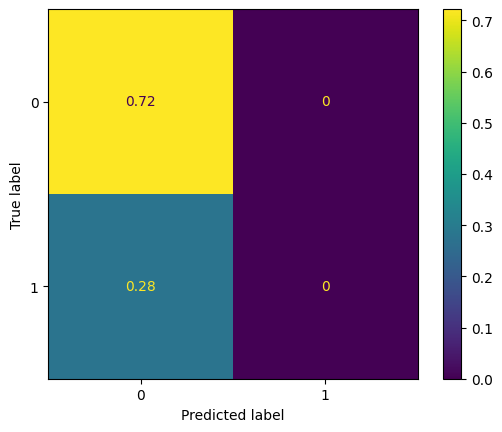

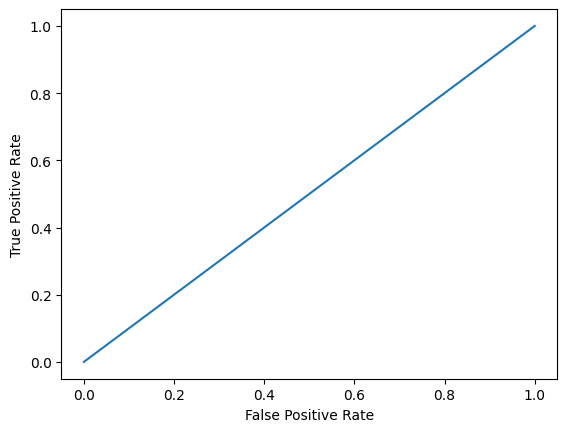

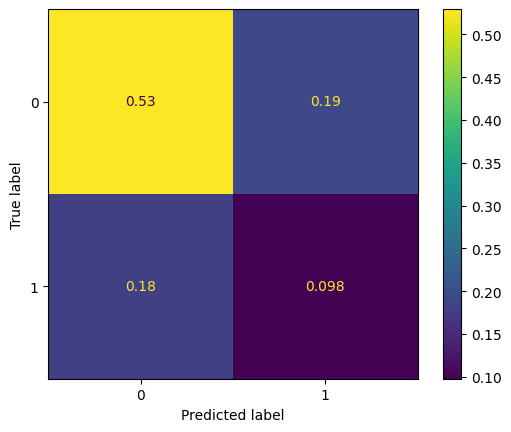

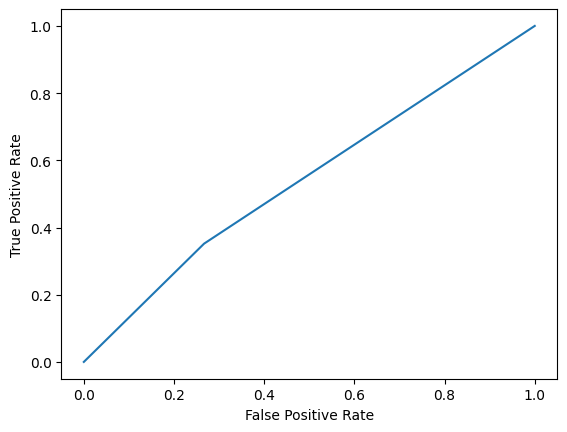

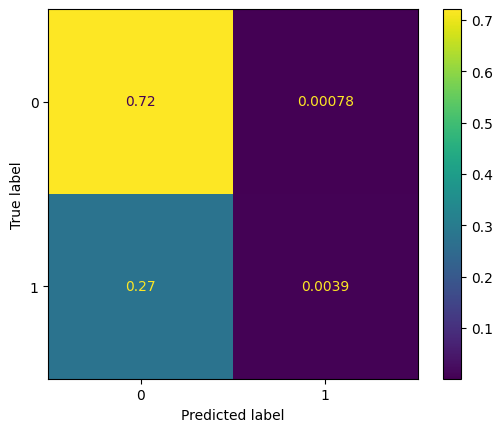

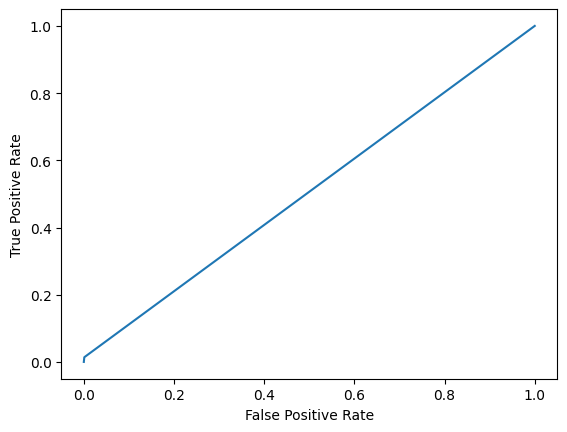

In [11]:

for fe_type, model in [('SVM Linear', svmLinear), ('SVM RBF', svmRbf), ('SVM Sigmoid', svmSigmoid), ('SVM Polynomial', svmPolynomial)]:
    start_time = datetime.now()
    y_pred_val = model.predict(X_val)
    end_time = datetime.now()
    time_diff = end_time - start_time
    print(f"Testing time: {time_diff.total_seconds() / 60}")

    y_pred = model.predict(xte)
    print(
        f"""
        {fe_type}
        Accuracy: {accuracy_score(y_val, y_pred_val)}
        Precision: {precision_score(y_val, y_pred_val)}
        Recall: {recall_score(y_val, y_pred_val)}
        F1-Score: {f1_score(y_val, y_pred_val)}
        ROC AUC: {roc_auc_score(y_val, y_pred_val)}
        Loss score: {hinge_loss(y_val, y_pred_val)}
        """
    )
    conf_matrix = confusion_matrix(y_val, y_pred_val, normalize='all')
    cm_display = ConfusionMatrixDisplay(conf_matrix).plot()
    fpr, tpr, _ = roc_curve(y_val, y_pred_val)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

GridSearch CV for each of the SVM Kernals

In [12]:



svmPolynomialGridSearch = GridSearchCV(svcPoly, param_grid={'C':[0.01, 0.1, 1, 10, 100], 'degree':[2,3,4,5],'gamma':['scale', 'auto'], 'coef0':[0, 1, 2, 3]}, cv=5, scoring='accuracy')
svmLinearGridSearch = GridSearchCV(svcLinear, param_grid={'C':[0.01, 0.1, 1, 10, 100]}, cv=5, scoring='accuracy')
svmRbfGridSearch = GridSearchCV(svcRbf, param_grid={'C':[0.01, 0.1, 1, 10, 100], 'gamma':['scale', 'auto']}, cv=5, scoring='accuracy')
svmSigmoidGridSearch = GridSearchCV(svcSigmoid, param_grid={'C':[0.01, 0.1, 1, 10, 100], 'gamma':['scale', 'auto'], 'coef0': [0, 1, 2, 3]}, cv=5, scoring='accuracy')


for fe_type, xtr, xte, model in [('SVC Linear', X_train, X_test, svmLinearGridSearch), ('SVC RBF', X_train, X_test, svmRbfGridSearch), ('SVC Sigmoid', X_train, X_test, svmSigmoidGridSearch), ('SVC Polynomial', X_train, X_test, svmPolynomialGridSearch)]:
    start_time = datetime.now()
    model.fit(xtr, y_train)
    end_time = datetime.now()
    time_diff = end_time - start_time
    print(f"Training time: {time_diff.total_seconds() / 60}")

    y_pred = model.predict(xte)
    print(
        f"""
        {fe_type}
        Accuracy: {accuracy_score(y_test, y_pred)}
        Precision: {precision_score(y_test, y_pred)}
        Recall: {recall_score(y_test, y_pred)}
        F1-Score: {f1_score(y_test, y_pred)}
        ROC AUC: {roc_auc_score(y_test, y_pred)}
        parameters: {model.best_params_}
        Loss score: {hinge_loss(y_test, y_pred)}
        """
    )
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='all')
    cm_display = ConfusionMatrixDisplay(conf_matrix).plot()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Training time: 76.49721

        SVC Linear
        Accuracy: 0.6972049689440993
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        parameters: {'C': 0.01}
        Loss score: 1.0
        


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training time: 4.4365604

        SVC RBF
        Accuracy: 0.717391304347826
        Precision: 0.6857142857142857
        Recall: 0.12307692307692308
        F1-Score: 0.20869565217391303
        ROC AUC: 0.5492890183313346
        parameters: {'C': 100, 'gamma': 'scale'}
        Loss score: 0.9798136645962733
        
Training time: 7.911100466666666


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



        SVC Sigmoid
        Accuracy: 0.6972049689440993
        Precision: 0.0
        Recall: 0.0
        F1-Score: 0.0
        ROC AUC: 0.5
        parameters: {'C': 0.01, 'coef0': 0, 'gamma': 'auto'}
        Loss score: 1.0
        


Grid Search Validation

In [ ]:

for fe_type, model in [('SVM Linear', svmLinearGridSearch), ('SVM RBF', svmRbfGridSearch), ('SVM Sigmoid', svmSigmoidGridSearch), ('SVM Polynomial', svmPolynomialGridSearch)]:
    start_time = datetime.now()
    y_pred_val = model.predict(X_val)
    end_time = datetime.now()
    time_diff = end_time - start_time
    print(f"Testing time: {time_diff.total_seconds() / 60}")

    y_pred = model.predict(xte)
    print(
        f"""
        {fe_type}
        Accuracy: {accuracy_score(y_val, y_pred_val)}
        Precision: {precision_score(y_val, y_pred_val)}
        Recall: {recall_score(y_val, y_pred_val)}
        F1-Score: {f1_score(y_val, y_pred_val)}
        ROC AUC: {roc_auc_score(y_val, y_pred_val)}
        Loss score: {hinge_loss(y_val, y_pred_val)}
        """
    )
    conf_matrix = confusion_matrix(y_val, y_pred_val, normalize='all')
    cm_display = ConfusionMatrixDisplay(conf_matrix).plot()
    fpr, tpr, _ = roc_curve(y_val, y_pred_val)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()